In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Chargement des données 
df = pd.read_csv('gapminder_data_graphs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      3675 non-null   object 
 1   continent    3675 non-null   object 
 2   year         3675 non-null   int64  
 3   life_exp     3675 non-null   float64
 4   hdi_index    3563 non-null   float64
 5   co2_consump  3671 non-null   float64
 6   gdp          3633 non-null   float64
 7   services     3675 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 229.8+ KB


On voit qu'on a 3 colonnes nous permettant de classer les données (pays, continent, année) ainsi que 5 colonnes contenant des valeurs numériques (espérance de vie, Indice de Développement Humain, consommation de CO2, Produit Intérieur Brut et pourcentage de travailleurs dans le secteur tertiaire). 

# Data Cleaning

country          0
continent        0
year             0
life_exp         0
hdi_index      112
co2_consump      4
gdp             42
services         0
dtype: int64

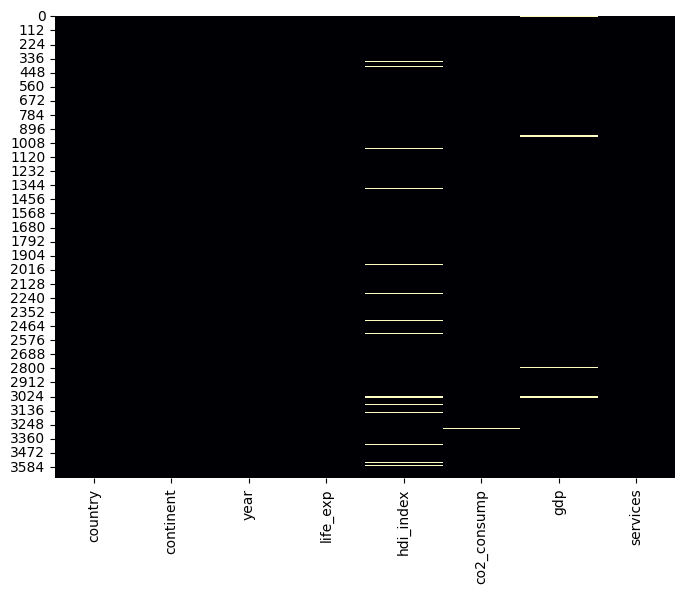

In [3]:
# On regarde les valeurs manquantes
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), cbar=False , cmap = 'magma')

df.isnull().sum()

In [4]:
# Affichage des villes et années avec valeurs d'IDH manquantes
df[df['hdi_index'].isna()][['country', 'year']]

,country,year
63,Angola,1998
189,Bahamas,1998
190,Bahamas,1999
357,Bhutan,1998
358,Bhutan,1999
...,...,...
3572,Vanuatu,2000
3573,Vanuatu,2001
3574,Vanuatu,2002
3575,Vanuatu,2003


Il est cohérent que plusieurs valeurs pour l'indice de développement humain soient manquantes dans le cas de certains pays car il n'était probablement possible de les calculer à l'époque.

In [5]:
# Affichage des villes et années avec les valeurs de PIB manquantes
df[df['gdp'].isna()][['country', 'year']]

,country,year
0,Afghanistan,1998
1,Afghanistan,1999
2,Afghanistan,2000
3,Afghanistan,2001
945,Djibouti,1998
946,Djibouti,1999
947,Djibouti,2000
948,Djibouti,2001
949,Djibouti,2002
950,Djibouti,2003


Dans le même cas que précédemment, ces pays manquent de données pour le Produit Brut Intérieur car les données n'étaient probablement pas disponibles à l'époque.

In [6]:
# Affichage des villes et années avec les valeurs de consommation de CO2 manquantes
df[df['co2_consump'].isna()][['country', 'year']]

,country,year
3276,Timor-Leste,1998
3277,Timor-Leste,1999
3278,Timor-Leste,2000
3279,Timor-Leste,2001


Avant 2002, le Timor oriental était une province de l'Indonésie. Nous n'avons donc pas de données pour cette période.

In [7]:
# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace = True)

# Vérification
df.isnull().sum()

country        0
continent      0
year           0
life_exp       0
hdi_index      0
co2_consump    0
gdp            0
services       0
dtype: int64

In [8]:
# On regarde si on a des données dupliquées
print("Nombre de données dupliquées : " , df.duplicated().sum())

Nombre de données dupliquées :  0


# Analyse des données

## Analyse descriptive ( moyenne, médiane, écart-type, histogrammes, boxplots, graphiques de lignes)

In [ ]:
# Moyenne des données par pays
df_without_year = df.drop('year', axis = 1)
df_mean = df_without_year.groupby('country').mean(numeric_only=True)
df_mean

,life_exp,hdi_index,co2_consump,gdp,services
country,,,,,
Afghanistan,59.911765,0.461059,0.194371,482.176471,31.135294
Albania,77.080952,0.731095,1.395476,3111.428571,37.328571
Algeria,73.571429,0.697095,3.241905,3739.047619,56.228571
Angola,58.830000,0.498700,1.052550,3517.500000,47.320000
Argentina,75.404762,0.811905,4.259524,12246.190476,76.057143
...,...,...,...,...,...
Vanuatu,64.564286,0.591000,0.463071,2798.571429,30.057143
Vietnam,73.071429,0.643095,1.315286,1539.904762,28.566667
Yemen,66.171429,0.478571,0.816429,2243.333333,53.690476


In [20]:
# moyenne la plus élevée pour chaque colonne
print("Pays avec les moyennes les plus haute : \n", df_mean.idxmax())
print("Pays avec les moyenne minimum : \n",df_mean.idxmin())

Pays avec les moyennes les plus haute : 
 life_exp                  Japan
hdi_index                Norway
co2_consump               Qatar
gdp                  Luxembourg
services       Hong Kong, China
dtype: object
Pays avec les moyenne minimum : 
 life_exp       Central African Republic
hdi_index                         Niger
co2_consump            Congo, Dem. Rep.
gdp                             Burundi
services                        Burundi
dtype: object


In [21]:
# Médianne des données par pays
df_median = df_without_year.groupby('country').median(numeric_only=True)
print(df_median)


             life_exp  hdi_index  co2_consump      gdp  services
country                                                         
Afghanistan     60.50      0.472       0.2450    533.0     30.70
Albania         77.60      0.728       1.4600   3300.0     36.90
Algeria         73.90      0.702       3.2700   3850.0     56.80
Angola          59.15      0.508       1.1600   3800.0     46.65
Argentina       75.70      0.821       4.4200  12900.0     75.60
...               ...        ...          ...      ...       ...
Vanuatu         64.60      0.591       0.4995   2805.0     29.00
Vietnam         73.00      0.647       1.3100   1500.0     30.30
Yemen           66.50      0.483       0.8950   2380.0     55.70
Zambia          54.10      0.503       0.1890   1070.0     23.00
Zimbabwe        49.70      0.442       0.8530   1430.0     25.80

[175 rows x 5 columns]


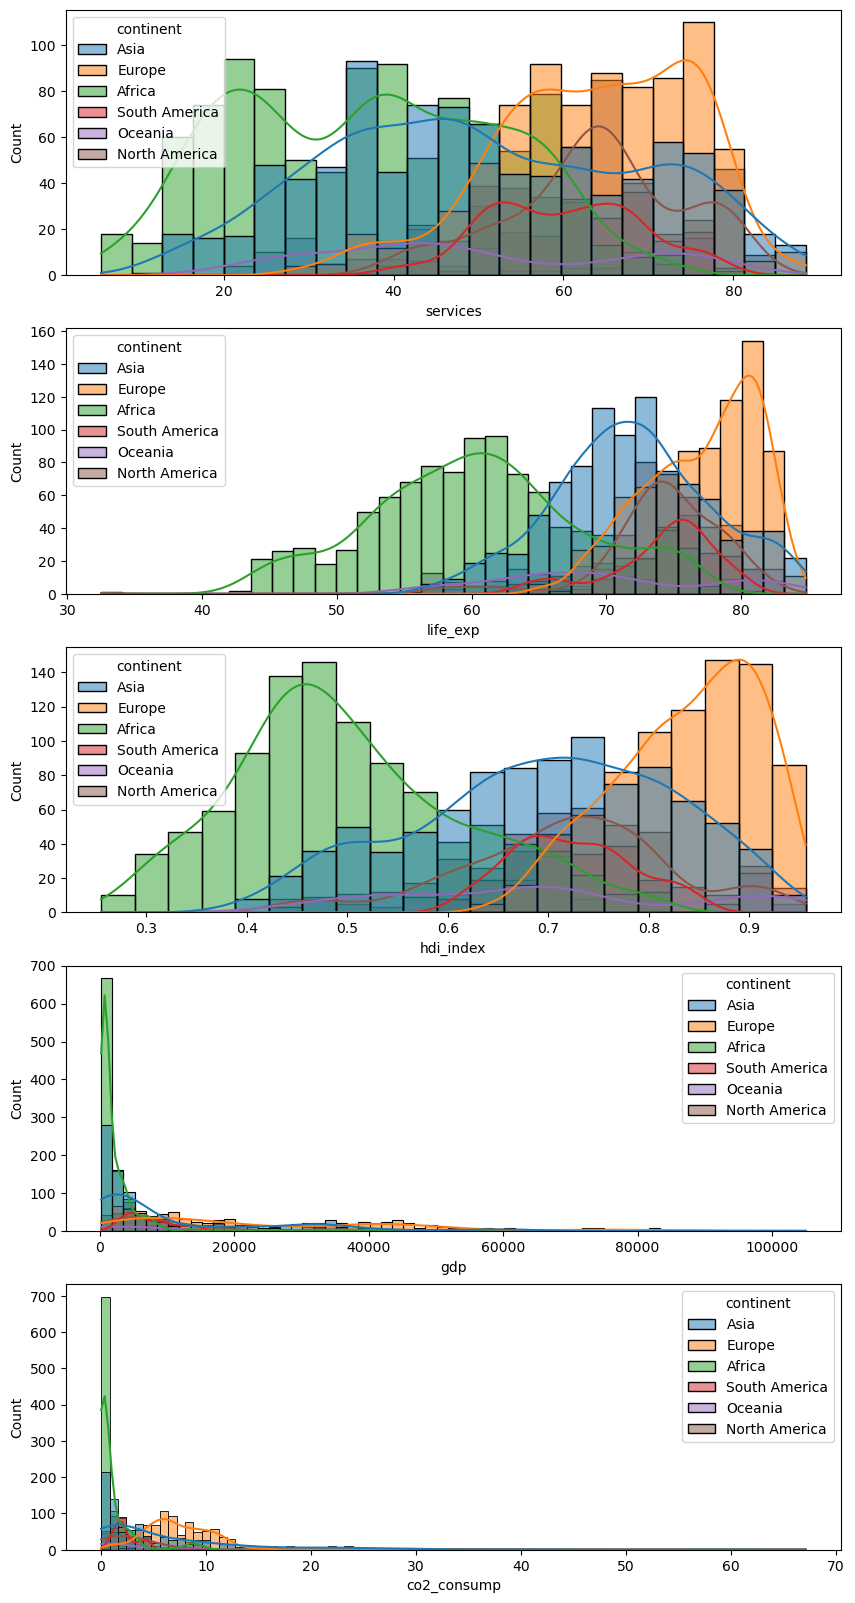

In [22]:
# histogramme comparaison des varibles par continent
fig, ax = plt.subplots(5, 1, figsize = (10, 20))
sns.histplot(data = df, x = 'services', hue = 'continent', ax = ax[0], kde = True)
sns.histplot(data = df, x = 'life_exp', hue = 'continent', ax = ax[1], kde = True)
sns.histplot(data = df, x = 'hdi_index', hue = 'continent', ax = ax[2], kde = True)
sns.histplot(data = df, x = 'gdp', hue = 'continent', ax = ax[3], kde = True)
sns.histplot(data = df, x = 'co2_consump', hue = 'continent', ax = ax[4], kde = True)
plt.show()

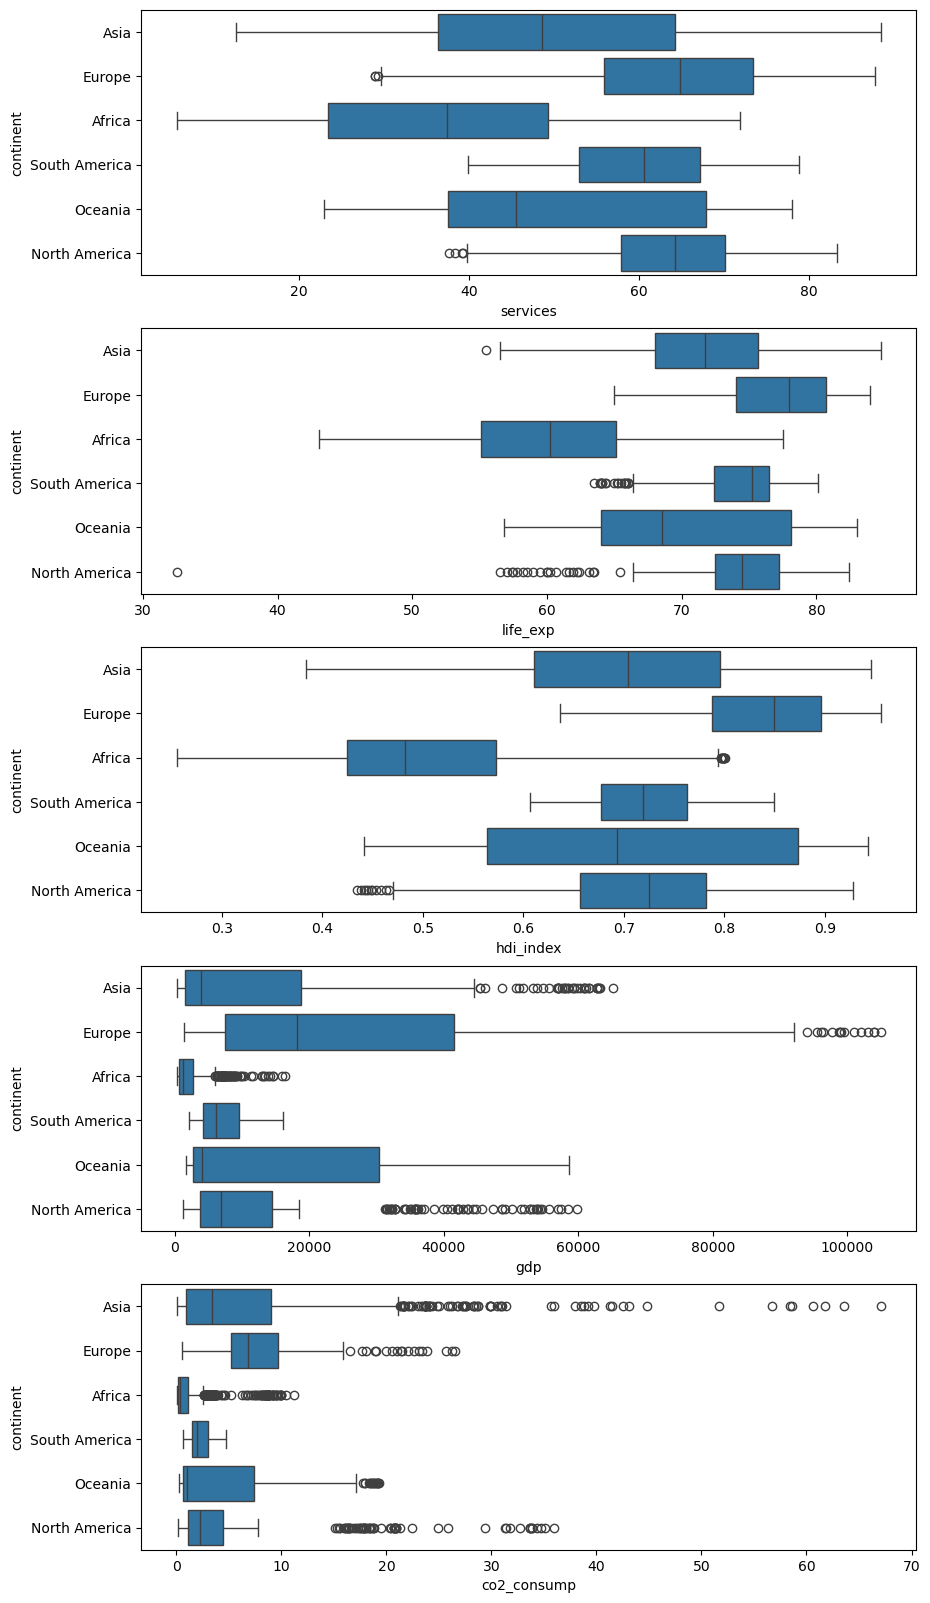

In [23]:
# boxplot comparaison des varibles par continent
fig, ax = plt.subplots(5, 1, figsize = (10, 20))
sns.boxplot(data = df, x = 'services', y = 'continent', ax = ax[0])
sns.boxplot(data = df, x = 'life_exp', y = 'continent', ax = ax[1])
sns.boxplot(data = df, x = 'hdi_index', y = 'continent', ax = ax[2])
sns.boxplot(data = df, x = 'gdp', y = 'continent', ax = ax[3])
sns.boxplot(data = df, x = 'co2_consump', y = 'continent', ax = ax[4])
plt.show()

In [ ]:
# graphique en barre de la consommation de CO2 par continent
fig = px.bar(df, x = 'continent', y = 'co2_consump', color = 'country', title = 'Consommation de CO2 par continent')
fig.show()

In [43]:
fig = px.bar(df, x = 'continent', y = 'life_exp', color = 'continent')
fig.show()

In [45]:
fig = px.bar(df, x = 'continent', y = 'services', color = 'continent')
fig.show()

In [46]:
fig = px.bar(df, x = 'continent', y = 'hdi_index', color = 'continent')
fig.show()

In [48]:
fig = px.bar(df, x = 'continent', y = 'gdp', color = 'continent')
fig.show()

## Corrélation entre les colonnes

On va regarder quelles sont les colonnes qui sont corrélées entre elles pour voir si on peut en déduire quelque chose.

<Axes: >

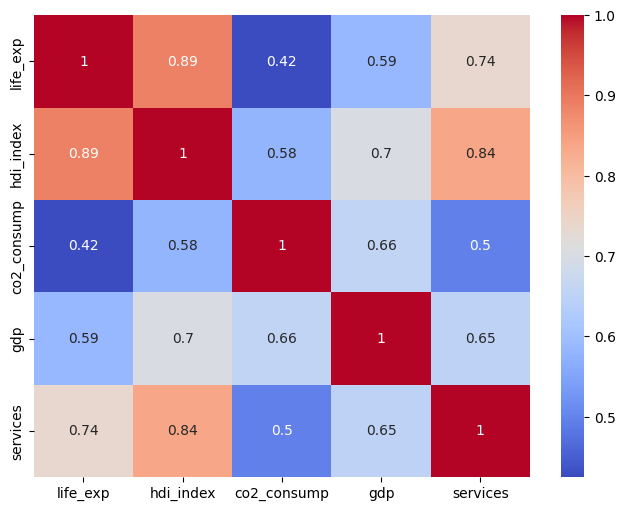

In [10]:
# On regarde les colonnes corrélées et on affiche dans une heatmap
df_num = df.select_dtypes(include = ['float64'])
correlation = df_num.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

On remarque que les valeurs des colonnes sont plutôt liées mais on voit notamment une forte corrélation entre l'IDH et l'espérance de vie ce qui est logique car l'IDH est calculé en prenant en compte l'espérance de vie. On observe également une corrélation importante entre l'IDH et le pourcentage de travailleurs dans le secteur tertiaire qui peut s'expliquer par le fait que les pays avec un IDH élevé ont souvent une économie tertiaire développée comme avec le tourisme par exemple.

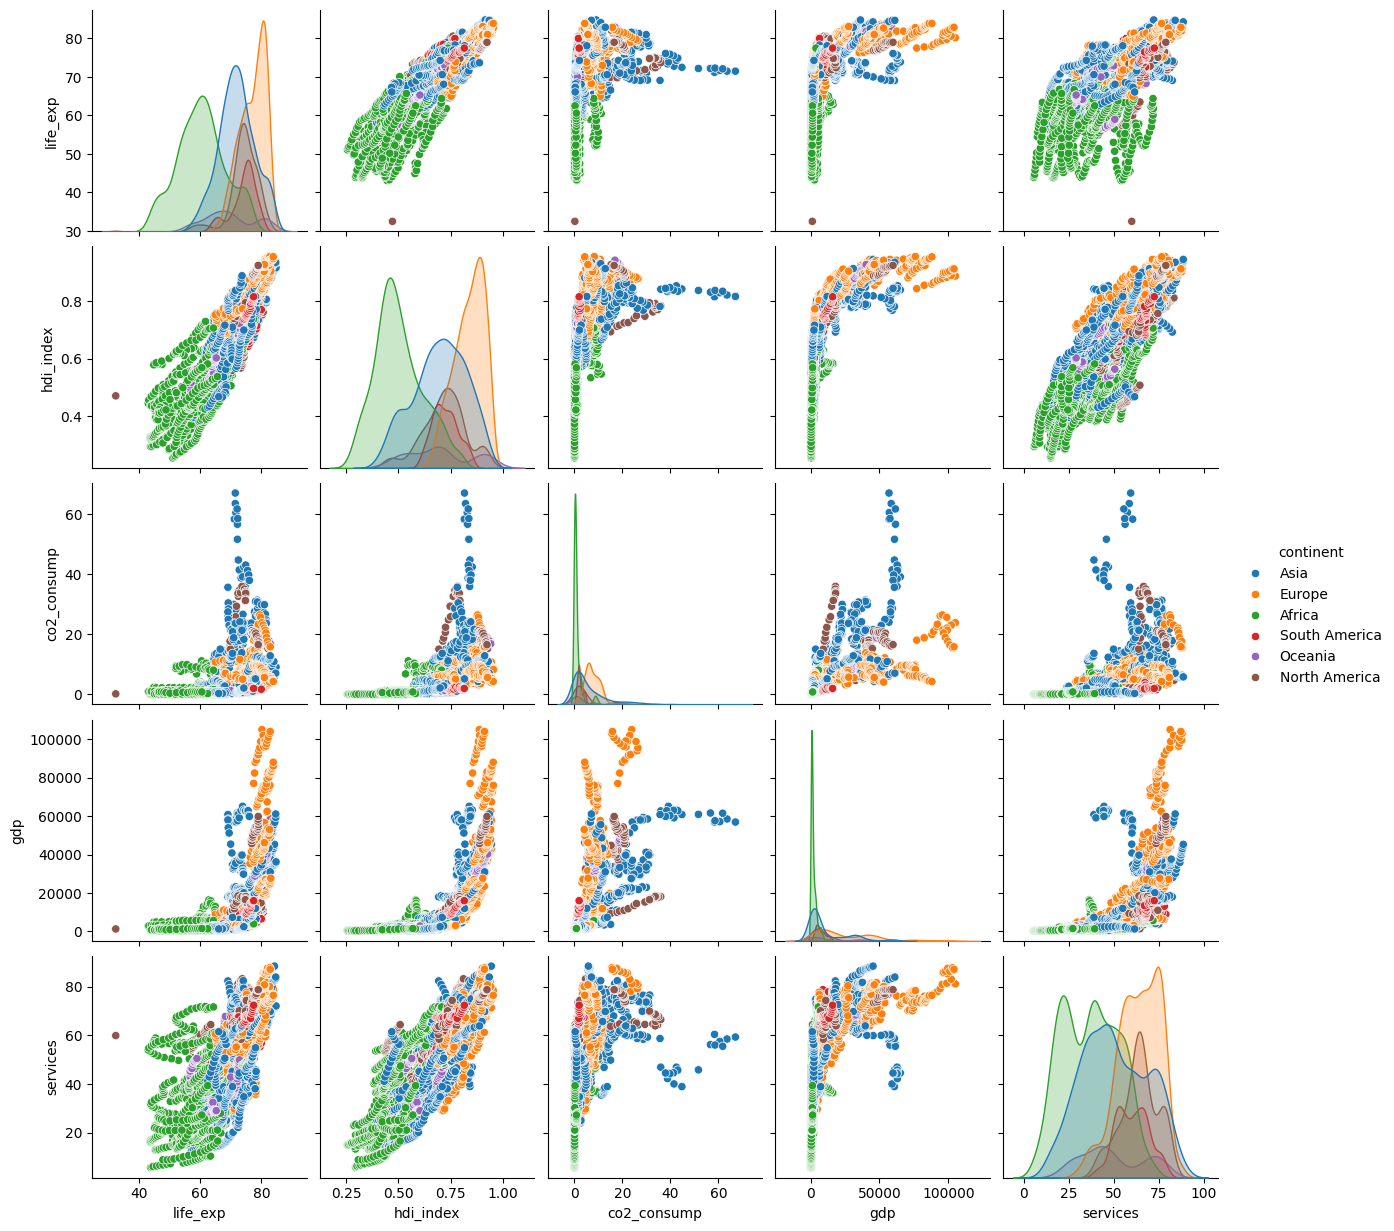

In [11]:
# Affichage des relations entre les colonnes
liste_colonnes = ["continent", "life_exp", "hdi_index", "co2_consump", "gdp", "services"]
sns.pairplot(data=df.loc[:, liste_colonnes], hue="continent")

Ces différents graphiques illustrent bien les corrélations plus ou moins fortes entre les différentes colonnes. Les graphiques avec des points désordonnés et dispersés montrent une faible corrélation entre les colonnes tandis que les graphiques avec des points qui suivent approximativement une droite montrent une corrélation plus forte.

On peut aussi essayer de regarder la corrélation entre les variables numériques et les différents continents pour voir si on peut en déduire quelque chose.

<Axes: >

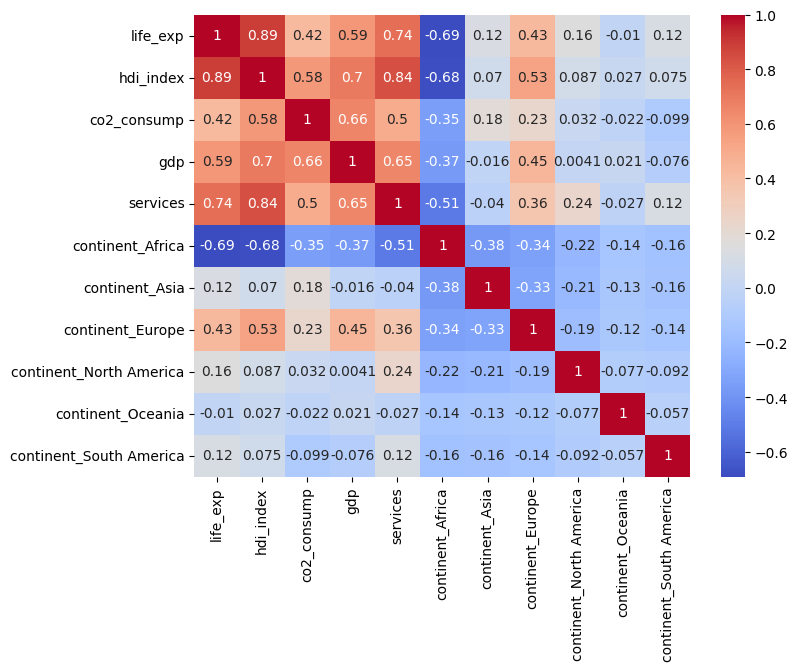

In [35]:
# On ajoute une variable pour chaque continent avec un booléen pour savoir si le pays est dans ce continent
df_variables_continents = pd.get_dummies(df, columns = ['continent'])
df_variables_continents = df_variables_continents.select_dtypes(include = ['float64', 'bool'])
# Corrélation entre les variables
correlation = df_variables_continents.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

On peut s'apercevoir ici que les coefficients de corrélation entre nos variables et les continents sont très différents selon les continents. Ceux-ci sont vont de 0.23 à 0.53 pour l'Europe tandis qu'ils sont situés entre -0.69 et -0.35 pour l'Afrique. Il est possible d'expliquer cela par le fait que l'Europe est un continent développé et possède donc des valeurs élevées pour l'IDH, le PIB ou l'espérance de vie alors que l'Afrique est un continent en développement et possède donc des valeurs plus faibles pour ces mêmes variables.

## Clustering

## Transformation de données

## Analyse temporelles et spatiales

In [36]:
# Création d'un graphique qui montre l'évolution de l'IDH et du % de services en fonction de l'année
df_complet = pd.read_csv('gapminder_data_graphs.csv')
graphique = px.scatter(df_complet, x = "hdi_index",  y = "services", color = "continent", animation_frame="year", range_x=[0,1], range_y= [0, 100])
graphique.show()